Note: Please download the code notebook and run the two Visualization Plots which are in the last 2 code cell blocks.  
The Outputs for the plots are cleared as they made the notebook size very large for it to be viewable in GitHub.

Models: Linear Regression & Predictions using Multiple Variables, Supervised Machine Learning Methods. 
*  Model 1: Target Variable: O3
*  Model 2: Target Variable: CO

In [2]:
# Import Modules and Packages. 
import numpy as np
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt  

from pathlib import Path
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing 

import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Data Extraction, Transformation, Loading 

In [6]:
# Read in cleansed data file 'data_drop.csv' from Temporary AWS S3 Bucket. Zipped data file is placed in the Resources folder. 

url="https://project-4-group-6-air-quality.s3.us-east-2.amazonaws.com/data_drop.csv"
air3_data_df = pd.read_csv(
    url,
    sep=',',
    encoding='utf-8',
)

# Display data sample
air3_data_df.head()


,Unnamed: 0,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,0,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,1,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,2,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4
3,3,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2
4,4,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0


In [7]:
# Verify that data is in a pandas dataframe
type(air3_data_df)

pandas.core.frame.DataFrame

In [8]:
# View the dataframe
air3_df=air3_data_df.drop(columns=["Unnamed: 0",'year','month','day','hour','wd'])
air3_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,5.7
1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,3.9
2,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,2.4
3,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,2.2
4,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
382163,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,1.3
382164,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,2.1
382165,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,1.5
382166,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,1.4


In [9]:
# View the data types and counts
air3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382168 entries, 0 to 382167
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PM2.5   382168 non-null  float64
 1   PM10    382168 non-null  float64
 2   SO2     382168 non-null  float64
 3   NO2     382168 non-null  float64
 4   CO      382168 non-null  float64
 5   O3      382168 non-null  float64
 6   TEMP    382168 non-null  float64
 7   PRES    382168 non-null  float64
 8   DEWP    382168 non-null  float64
 9   RAIN    382168 non-null  float64
 10  WSPM    382168 non-null  float64
dtypes: float64(11)
memory usage: 32.1 MB


In [11]:
# View the column names
print(air3_df.columns)

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM'],
      dtype='object')


In [12]:
# Get Metrics of the columns in dataframe
air3_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


1. Model 1:  Predict for Target = O3

In [13]:
# Model1 Create Feature Variables 
X = air3_df.drop('O3',axis= 1) 
y = air3_df['O3'] 
print(X) 
print(y)

        PM2.5  PM10   SO2   NO2     CO  TEMP    PRES  DEWP  RAIN  WSPM
0         9.0   9.0   3.0  17.0  300.0  -0.5  1024.5 -21.4   0.0   5.7
1         4.0   4.0   3.0  16.0  300.0  -0.7  1025.1 -22.1   0.0   3.9
2         4.0   4.0   9.0  25.0  300.0  -2.4  1027.5 -21.3   0.0   2.4
3         5.0   5.0  10.0  29.0  400.0  -2.5  1028.2 -20.4   0.0   2.2
4         3.0   6.0  12.0  40.0  400.0  -1.4  1029.5 -20.4   0.0   3.0
...       ...   ...   ...   ...    ...   ...     ...   ...   ...   ...
382163   11.0  11.0   2.0   2.0  200.0  11.7  1008.9 -13.3   0.0   1.3
382164   13.0  13.0   2.0   2.0  200.0  10.9  1009.0 -14.0   0.0   2.1
382165    9.0  14.0   2.0   2.0  200.0   9.5  1009.4 -13.0   0.0   1.5
382166   10.0  12.0   2.0   2.0  200.0   7.8  1009.6 -12.6   0.0   1.4
382167   13.0  16.0   4.0   9.0  500.0   7.0  1009.4 -12.2   0.0   1.9

[382168 rows x 10 columns]
0          89.0
1          88.0
2          78.0
3          67.0
4          52.0
          ...  
382163     99.0
382164  

Model 1 Scatter Plot of original data with Ozone (O3) and Temperature (TEMP)

In [14]:
# Model1. Create Train and Test sets 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101) 

Model 1 Linear Regression

In [15]:
# Model1. Create the regression model 
model = LinearRegression() 

In [16]:
# Model1. Fitting the model 
model.fit(X_train,y_train)

LinearRegression()

In [17]:
# Model1. Make Predictions 
predictions = model.predict(X_test)

In [18]:
# Model1. Evaluations. Assess the Model with MSE, MAE, Intercept, Coefficients array
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 

print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

print('Intercept: ', model.intercept_)  

print('Coefficients array: ', model.coef_) 


mean_squared_error :  1378.584450481671
mean_absolute_error :  27.07180456217113
Intercept:  -114.60402268800524
Coefficients array:  [ 1.55609484e-01  4.08456121e-02  2.86534181e-01 -7.96049056e-01
  1.31870968e-03  4.34010729e+00  1.29323127e-01 -1.58976977e+00
  7.57806548e-01  2.24074586e+00]


In [19]:
# Model1. Compute metrics for the linear regression model: score, r2, MSE, RMSE, Std Deviation
score = model.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.5724457157382516.
The r2 is 0.5724457157382516.
The mean squared error is 1378.584450481671.
The root mean squared error is 37.12929369758696.
The standard deviation is 56.70893843043617.


Model 1. Target Feature = O3.

Mean value of original data for O3 is 57.376676 and the r2 value is .5724457157382516 

The Mean Absolute Value of 27.07180456217113 is good as well. 

This linear regression model is good.   

2. Model2: Predict for Target = CO

Model 2. Linear Regression. 

In [22]:
# Model2. Create Feature Variables 
X = air3_df.drop('CO',axis= 1) 
y = air3_df['CO'] 
print(X) 
print(y)

        PM2.5  PM10   SO2   NO2     O3  TEMP    PRES  DEWP  RAIN  WSPM
0         9.0   9.0   3.0  17.0   89.0  -0.5  1024.5 -21.4   0.0   5.7
1         4.0   4.0   3.0  16.0   88.0  -0.7  1025.1 -22.1   0.0   3.9
2         4.0   4.0   9.0  25.0   78.0  -2.4  1027.5 -21.3   0.0   2.4
3         5.0   5.0  10.0  29.0   67.0  -2.5  1028.2 -20.4   0.0   2.2
4         3.0   6.0  12.0  40.0   52.0  -1.4  1029.5 -20.4   0.0   3.0
...       ...   ...   ...   ...    ...   ...     ...   ...   ...   ...
382163   11.0  11.0   2.0   2.0   99.0  11.7  1008.9 -13.3   0.0   1.3
382164   13.0  13.0   2.0   2.0  101.0  10.9  1009.0 -14.0   0.0   2.1
382165    9.0  14.0   2.0   2.0  102.0   9.5  1009.4 -13.0   0.0   1.5
382166   10.0  12.0   2.0   2.0   97.0   7.8  1009.6 -12.6   0.0   1.4
382167   13.0  16.0   4.0   9.0   74.0   7.0  1009.4 -12.2   0.0   1.9

[382168 rows x 10 columns]
0         300.0
1         300.0
2         300.0
3         400.0
4         400.0
          ...  
382163    200.0
382164  

In [30]:
# Model2. Create Train and Test sets 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101) 

In [31]:
# Model2. Create the regression model 
model2 = LinearRegression() 

In [32]:
# Model2. Fitting the model 
model2.fit(X_train,y_train)

LinearRegression()

In [33]:
# Model2. Make Predictions 
predictions2 = model2.predict(X_test)

In [34]:
# Model2. Evaluations / Assess the Model MSE, MAE, Intercept, Coefficient
print ('mean_squared_error : ', mean_squared_error(y_test, predictions2)) 
print ('mean_absolute_error : ', mean_absolute_error(y_test, predictions2)) 
print('Intercept: ', model2.intercept_)  
print('Coefficients array: ', model2.coef_)  

mean_squared_error :  370530.05017968314
mean_absolute_error :  376.8932019597799
Intercept:  1217.1803635118758
Coefficients array:  [  7.93932086  -0.26528407   6.42775836   7.40794387   0.35726346
 -30.03520468  -0.70695732  12.83918893  10.41297902   2.03132087]


In [35]:
# Model2. Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model2.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, predictions2)
mse = mean_squared_error(y_test, predictions2)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.723158568713435.
The r2 is 0.723158568713435.
The mean squared error is 370530.05017968314.
The root mean squared error is 608.7117956633361.
The standard deviation is 1157.1499624414525.


Pair Plots for Relationships between All Features 

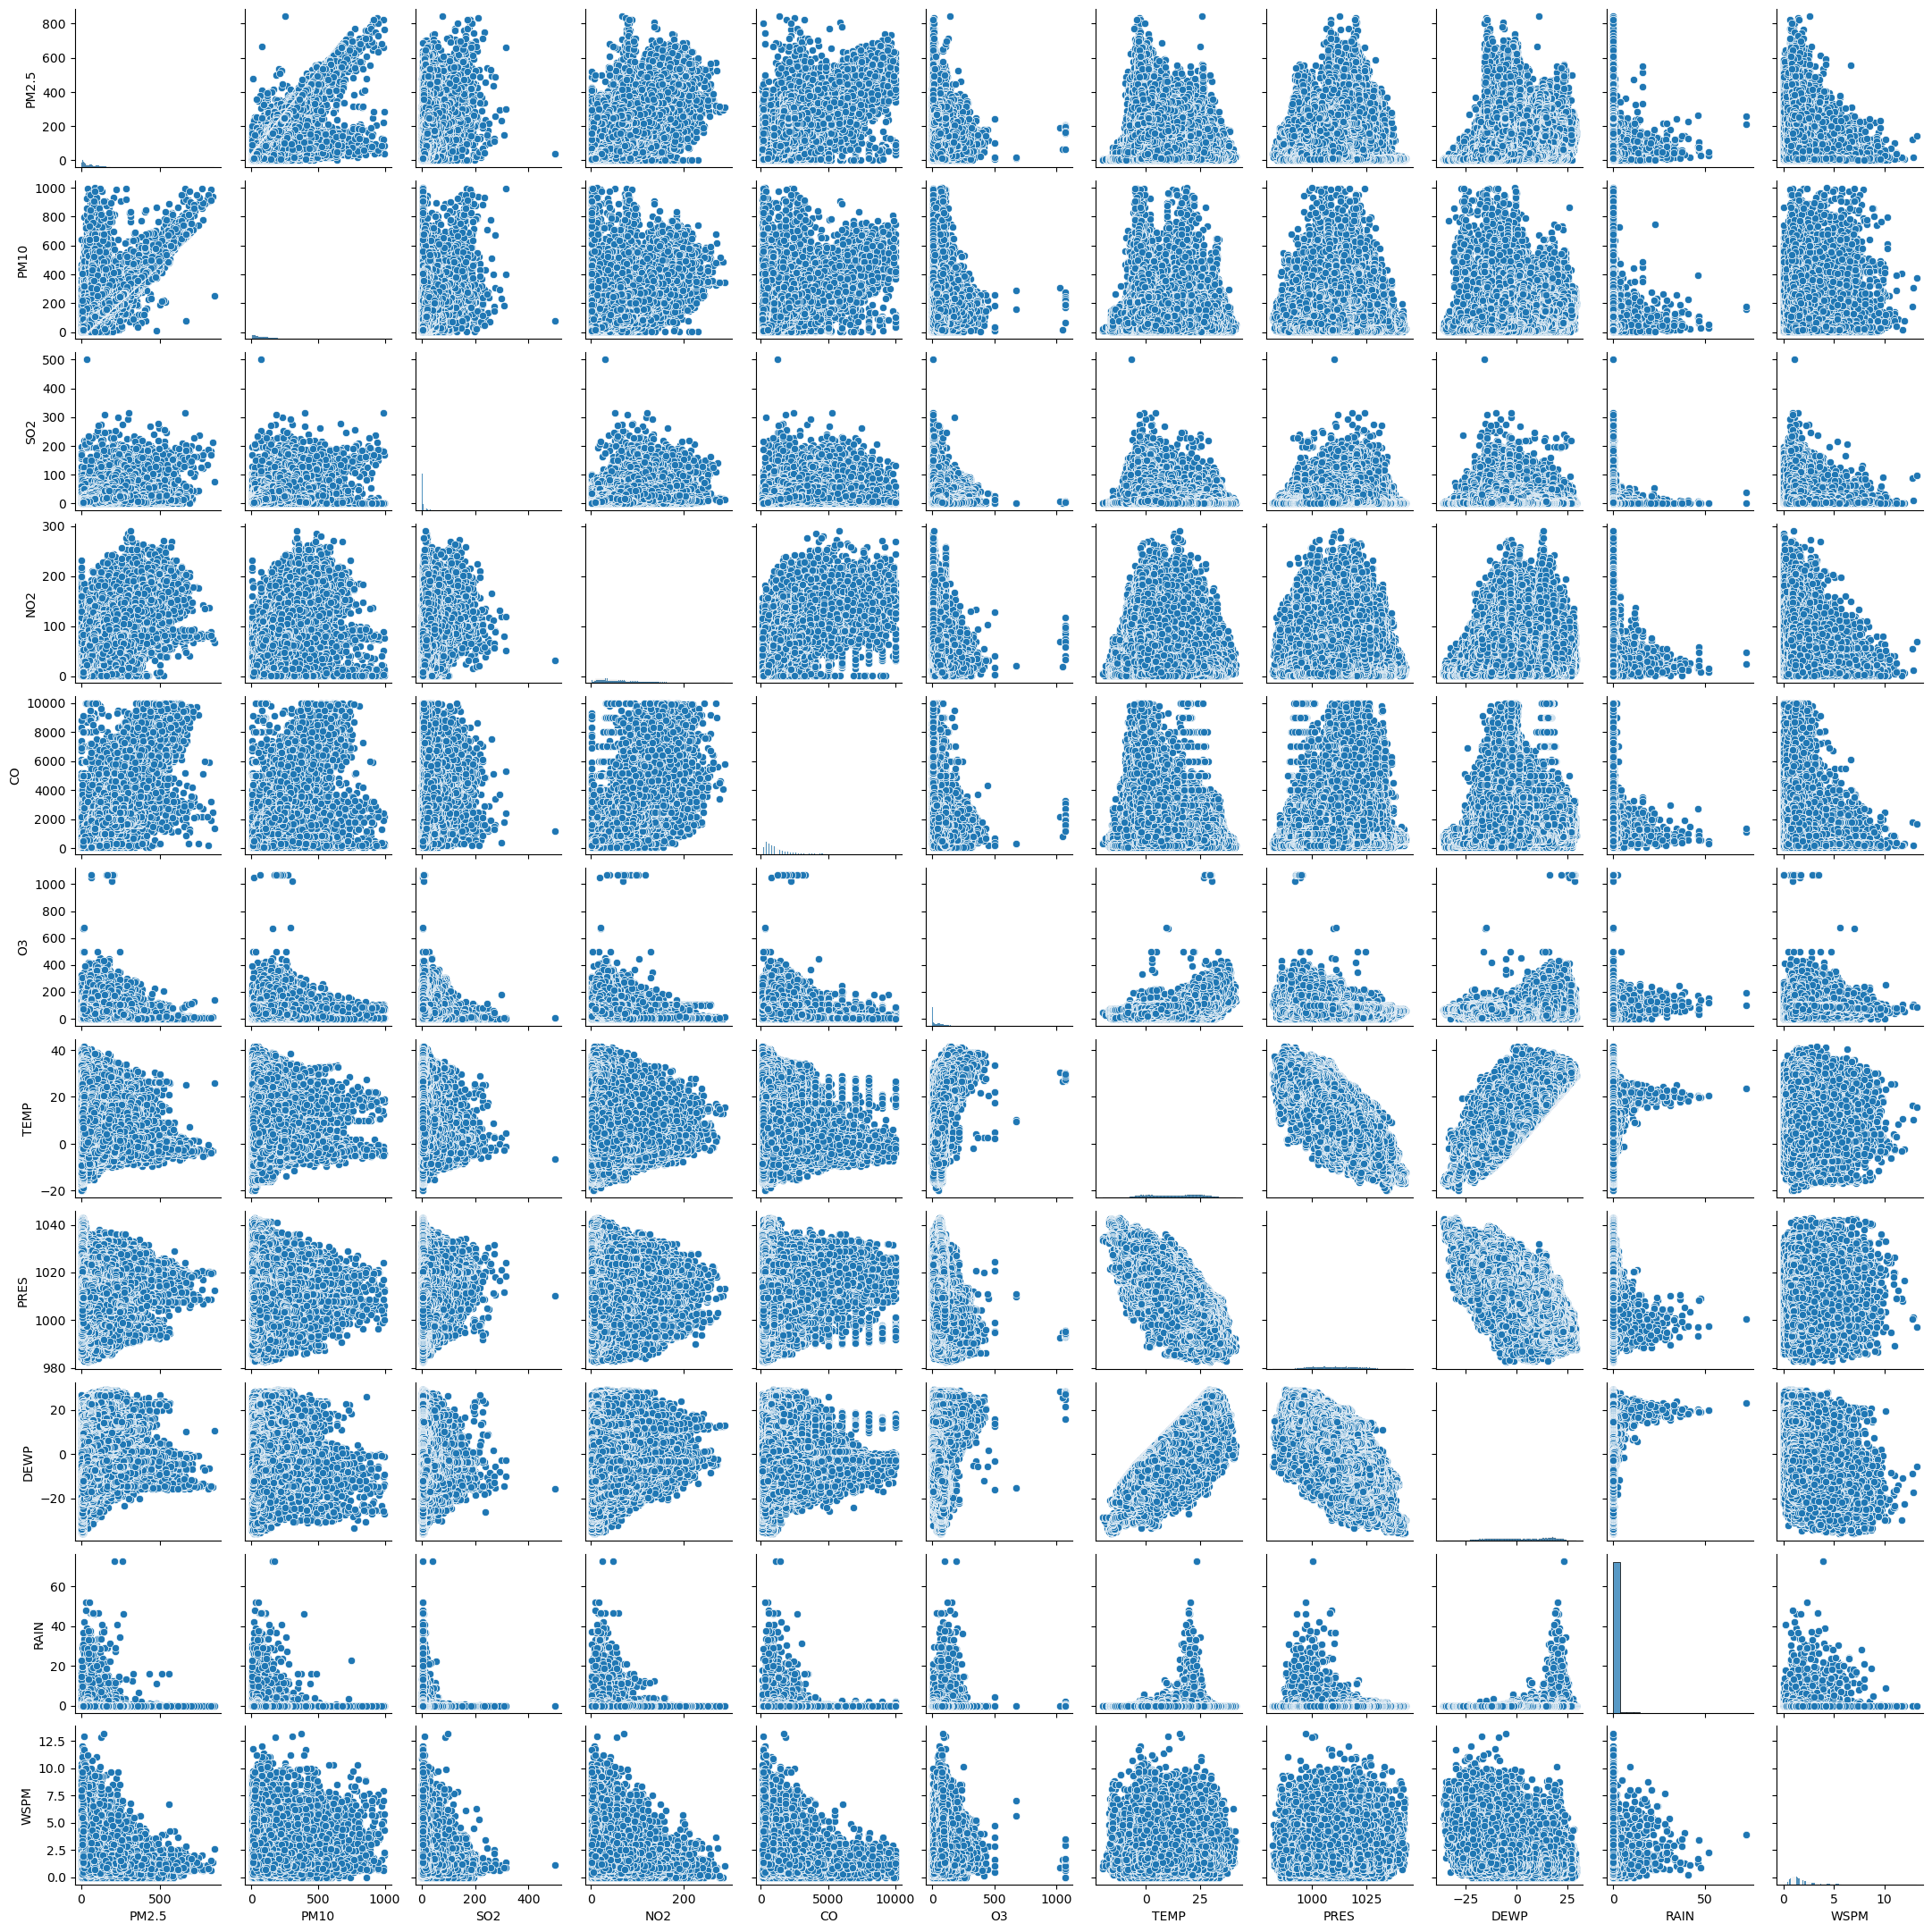

In [36]:
# Visualizing the relationships between all Features using pair plots  
sns.pairplot(data = air3_df, height = 2) 

Pearson Correlation Coefficient value computed between every two Air Quality and Weather Features, and Seaborn's Heatmap Plot to display matrix. 

Multicollinearity
The multiple linear regression model assumes no correlation exists between the predictors or the independent variables employed in the regression. Using the corr() method from the Pandas dataframe, we can compute the Pearson correlation coefficient value between every two features of our data and build a matrix to see whether there is any correlation between any predictors. After that, we can use Seaborn's heatmap() plot to display the matrix as a heatmap. 
The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables.

Pearson correlation coefficient matrix for each independent variable: 
           PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.884324  0.482209  0.670753  0.792041 -0.151149 -0.128907   
PM10   0.884324  1.000000  0.466561  0.653577  0.703535 -0.114345 -0.094793   
SO2    0.482209  0.466561  1.000000  0.501317  0.535289 -0.167093 -0.320991   
NO2    0.670753  0.653577  0.501317  1.000000  0.705651 -0.476812 -0.276387   
CO     0.792041  0.703535  0.535289  0.705651  1.000000 -0.315060 -0.323402   
O3    -0.151149 -0.114345 -0.167093 -0.476812 -0.315060  1.000000  0.597098   
TEMP  -0.128907 -0.094793 -0.320991 -0.276387 -0.323402  0.597098  1.000000   
PRES   0.013717 -0.021942  0.218994  0.172287  0.183800 -0.447437 -0.812456   
DEWP   0.118009  0.072706 -0.266446 -0.028276 -0.054173  0.313267  0.820672   
RAIN  -0.015268 -0.026885 -0.040618 -0.043946 -0.013302  0.023194  0.037182   
WSPM  -0.275686 -0.185789 -0.109259 -0.402566 -0.297760  0.

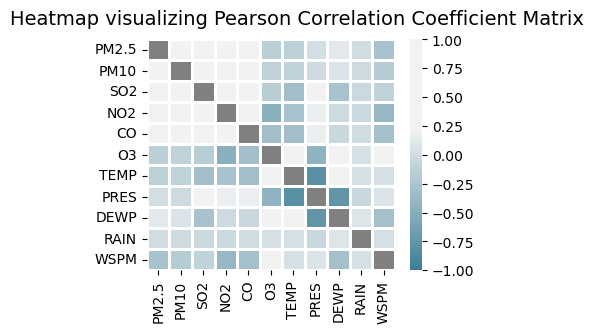

In [38]:
# Visualizing Multicollinearity with Pearson Correlation Coefficient Matrix between All Features (as Independent Features) Features using a Heatmap  
# did not include the date & Time, 'Wd' or the Unnamed: 01 columns 
  
corr = air3_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM']].corr()  
print('Pearson correlation coefficient matrix for each independent variable: \n', corr)  
  
# Masking the diagonal cells   
masking = np.zeros_like(corr, dtype = bool)  
np.fill_diagonal(masking, val = True)  
  
# Initializing a matplotlib figure  
figure, axis = plt.subplots(figsize = (4, 3))  
  
# Generating a custom colormap  
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
c_map.set_bad('grey')  
  
# Displaying the heatmap with the masking and the correct aspect ratio  
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  